In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import pandas as pd

import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

from scipy.optimize import minimize

In [2]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import scipy.stats as scs

In [3]:
import warnings
warnings.filterwarnings('ignore')


# Временные ряды
<p>Курс "Модели и методы интеллектуального анализа данных"</p>
<p>Чернышов Ю.Ю., к.ф.-м.н., доцент кафедры "ИТЗИ"</p>
<p>УрГУПС, 2020</p>

# Оглавление <a name='toc'></a>
<ol>
<li><a href='#intro'>Введение</a></li>
<li><a href='#terms'>Термины</a></li>
<li><a href='#tools'>Полезные функции стандартных библиотек</a></li>
<li><a href='#slides'>Алгоритмы выравнивания временных рядов</a></li>
    <ol>
        <li><a href='#ma'>Метод среднего значения в скользящем окне (Moving Average)</a></li>
        <li><a href='#ea'>Экспоненциальное выравнивание</a></li>
        <li><a href='#dea'>Двойное экспоненциальное выравнивание</a></li>
        <li><a href='#tea'>Тройное экспоненциальное выравнивание (модель Хольта-Винтерса)</a></li>
        <li><a href='#metrics'>Метрики качества предсказания</a></li>
        <li><a href='#cv'>Кросс-валидация временного ряда</a></li>
    </ol>
<li><a href='#standard'>Стандартные методы анализа временных рядов</a></li>
    <ol>
        <li><a href='#AR'>Модель авторегрессии AR</a></li>    
        <li><a href='#MA'>Метод скользящего среднего MA</a></li>    
        <li><a href='#ARMA'>Метод авторегрессионного скользящего среднего ARMA</a></li>    
        <li><a href='#ARIMA'>Авторегрессионное интегрированное скользящее среднее ARIMA</a></li>                   
        <li><a href='#SARIMA'>Модель SARIMA</a></li>
        <li><a href='#SARIMAX'>Модель SARIMAX</a></li>
        <li><a href='#VAR'>Модель VAR</a></li>
        <li><a href='#VARMA'>Модель VARMA</a></li>
        <li><a href='#VARMAX'>Модель VARMAX</a></li>
    </ol>
<li><a href='#neural'>Нейронные сети для анализа временных рядов</a></li>
<li><a href='#example1'>Пример 1: применение моделей ARIMA и SARIMA к искусственным данным </a></li>
    <ol>
        <li><a href='#ARIMA-example'>ARIMA</a></li>
        <li><a href='#SARIMA-example'>SARIMA</a></li>
    </ol>
<li><a href='#example2'>Пример 2: анализ многомерных временных рядов</a></li>
<li><a href='#links'>Ссылки</a></li>
</ol>

# Введение <a name='intro'></a>



Временной ряд это последовательность значений (например, результатов измерений какой-то величины) с учетом времени получения каждого значения. Числовые данные во временных рядах упорядочены с учетом временной метки, этим временной ряд отличается от обычной статистической выборки. Для временных рядов используются специальные алгоритмы для решения типовых задач (сглаживания, прогнозирования, поиска аномалий).

Примеры временных данных - биржевой курс акций, данные прогноза погоды, данные с датчиков работы устройства (температура, напряжение, вибрация, шум), показания медицинских приборов, графики продаж и т.п.

Типовые задачи, для которых используется анализ временных рядов:
- выявление структуры ряда, 
- прогнозирование, 
- определение тенденции развития (тренда),
- поиск аномалий в значениях ряда.

При анализе временных рядов применяются различные модели, выбор конкретной модели зависит от свойств ряда, требуемого качества, периода прогноза, ограничений по времени на обучение. Стандартные методы анализа временных рядов используют линейные зависимости, однако справляются с широким спектром задач, являются сложными, требовательными к качеству и предварительной подготовке данных, требуют настройки гиперпараметров. К стандартным методам анализа временных рядов относятся:
- Авторегрессия (AR)
- Скользящая средняя (MА)
- Авторегрессионная скользящая средняя (ARMA)
- Авторегрессионное интегрированное скользящее среднее (ARIMA)
- Сезонные авторегрессионные интегрированные скользящие средние (SARIMA)
- Сезонные авторегрессионные интегрированные скользящие средние с экзогенными регрессорами (SARIMAX)
- Векторная авторегрессия (VAR)
- Скользящее среднее векторной авторегрессии (VARMA)
- Скользящее среднее векторной авторегрессии с экзогенными регрессорами (VARMAX)
- Простое экспоненциальное сглаживание (SES)
- Экспоненциальное сглаживание Холта Винтера (HWES)

Более сложным, по сравнению со стандартными,  методом для классификации и прогнозирования временных рядов является машинное обучение. Конволюционные (сверточные) сети (Convolutional Neural Network, CNN) и рекуррентные сети (Recurrent Neural Network, RNN) позволяют при классификации и прогнозе учитывать исторические (предшествующие) значения ряда и взаимосвязь между элементами.

<a href='#toc'>Назад к Оглавлению</a>

# Термины <a name='terms'></a>

- Нестационарность - изменение во времени числовых статистических характеристик (математического ожидания, дисперсии, ковариации).

- Регрессия - стохастическая (вероятностная) зависимость между переменными

- Корреляция - статистическая взаимосвязь случайных величин

- Автокорреляция - статистическая взаимосвязь между значениями одного ряда, взятыми с сдвигом (например, для временных рядов - значения одного ряда, взятые с разными сдвигами по времени)


Методы анализа временных рядов

- Авторегрессия (AR, Auto Regression) - выполняет предсказание значения ряда моделью $\hat{y} (t_i)$ (для момента времени $t_i$) как линейную комбинацию $p$ предыдущих значений ряда $y_j = y(t_j), j \in [i-p, i-1]$.

- Скользящая средняя (MА, Mean Average) - моделирует следующий шаг в последовательности как линейную функцию от остаточных ошибок из среднего процесса на предыдущих временных шагах.

- Авторегрессионная скользящая средняя (ARMA) - моделирует следующий шаг в последовательности как линейную функцию наблюдений и случайных ошибок на предыдущих временных шагах

- Авторегрессионное интегрированное скользящее среднее (ARIMA, Autoregressive Integrated Moving Average, также модель/методология Бокса — Дженкинса)

- Сезонные авторегрессионные интегрированные скользящие средние (SARIMA) - моделирует следующий шаг в последовательности как линейную функцию разностных наблюдений, ошибок, разностных сезонных наблюдений и сезонных ошибок на предыдущих временных шагах.

- Сезонные авторегрессионные интегрированные скользящие средние с экзогенными регрессорами (SARIMAX) - является расширением модели SARIMA, которая также включает моделирование экзогенных (т.е. внешних) переменных.        

- Векторная авторегрессия (VAR) моделирует многомерные временные ряды

- Скользящее среднее векторной авторегрессии (VARMA) в многомерных временных рядах моделирует следующий шаг в каждом временном ряду, используя модель ARMA

- Скользящее среднее векторной авторегрессии с экзогенными регрессорами (VARMAX) является расширением модели VARMA, которая также включает моделирование экзогенных переменных. Это многовариантная версия метода ARMAX.

- Простое экспоненциальное сглаживание

- Экспоненциальное сглаживание Холта Винтера



<a href='#toc'>Назад к Оглавлению</a>

# Полезные функции стандартных библиотек <a name='tools'></a>

Для демонстрации работы функций используем набор данных - временной ряд со значениями периодической функции $y = \sin (x)$ с добавлением "шума".

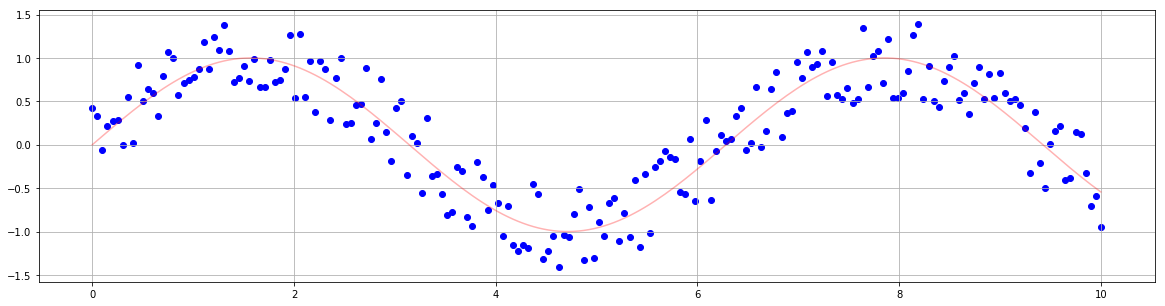

In [4]:
num = 200
xs = np.linspace(0, 10, num)
ys = np.sin(xs) + np.random.random(num) - 0.5

plt.figure(figsize=(20,5))
plt.plot(xs, np.sin(xs), c='r', alpha=0.3)
plt.scatter(xs, ys, c='b')
plt.grid(True)
plt.show()

In [5]:
df = pd.DataFrame({'Values': ys}, index=xs)

#### pandas.plotting.lag_plot()

Рисует значение исходного и смещенного ряда. Удобно для определения внутренней корреляции (автокорреляции).

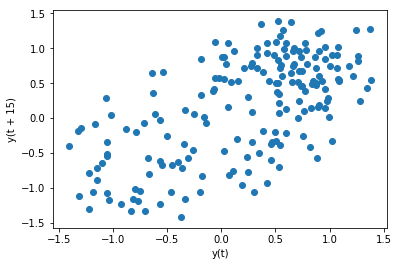

In [6]:
pd.plotting.lag_plot(df.Values, lag=15)
plt.show()

#### pandas.DataFrame.pct_change()

Computes percentage change between current and previous element.

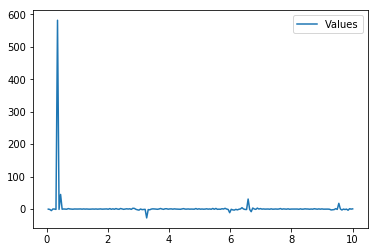

In [7]:
df.pct_change().plot()
plt.show()

#### pandas.DataFrame.diff(period=n)

Вычисляется разность между рядом и рядом со сдвигом, заданным периодом.

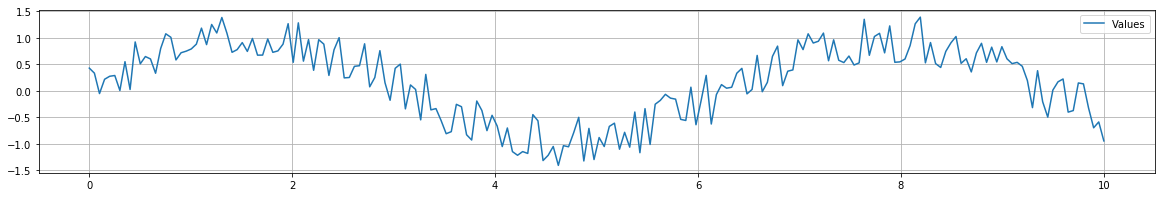

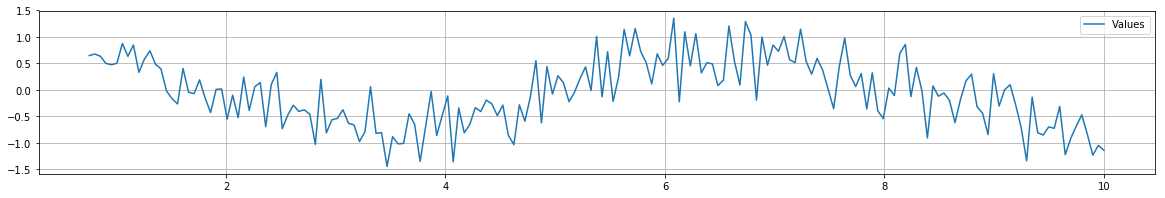

In [8]:
df.plot(figsize=(20, 3), grid=True)
df.diff(periods=15).plot(figsize=(20, 3), grid=True)
plt.show()

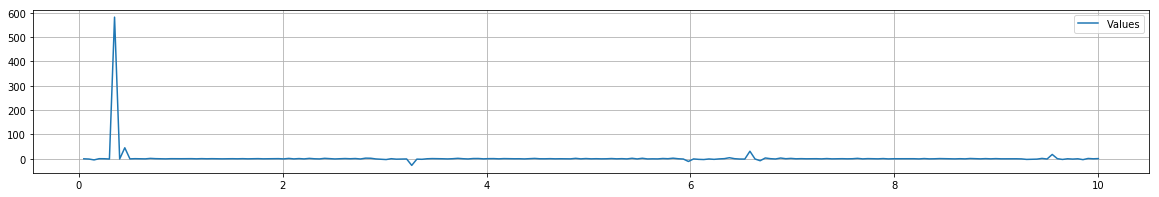

In [9]:
df.pct_change().plot(figsize=(20, 3), grid=True)
plt.show()

#### pandas.DataFrame.autocorr()

Вычисляет автокорреляцию

In [10]:
print(df['Values'].autocorr())

0.8292708601093085


#### pandas.plotting.autocorrelation_plot()

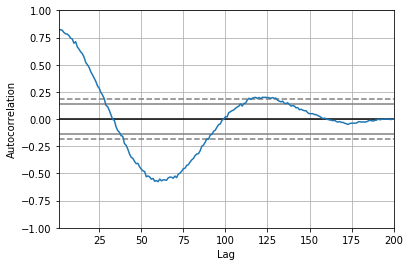

In [11]:
pd.plotting.autocorrelation_plot(df.Values)
plt.show()

#### statmodels.graphics.tsa_plots.plot_acf

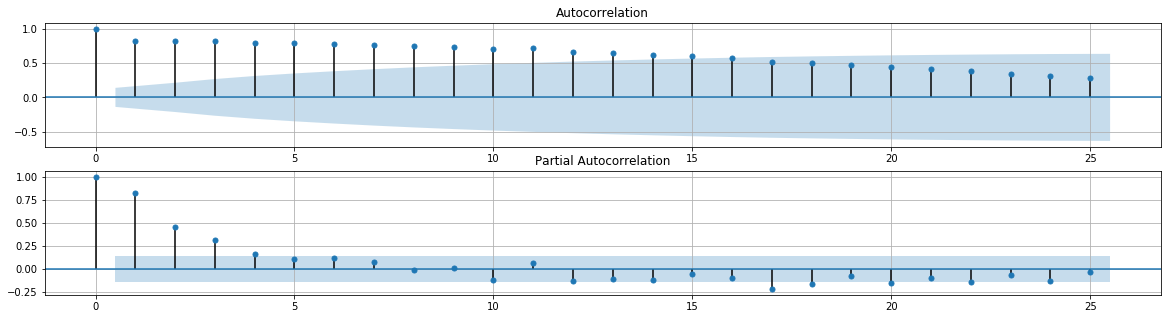

In [12]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(211)
plot_acf(df.Values, lags=25, ax=ax1)
ax1.grid(True)

ax2 = fig.add_subplot(212)
plot_pacf(df.Values, lags=25, ax=ax2)
ax2.grid(True)

plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Алгоритмы выравнивания временных рядов <a name='slides'></a>

## Метод среднего значения в скользящем окне (Moving average) <a name='ma'></a>

Для формирования прогноза поведения величины в текущем периоде $y_t$ используется среднее значение величины за предыдущий период определенной длины (окно) $[y_{t-m},y_{t-1}]$.

$$
\Large
\hat{y_{t}} = \frac{1}{m}\sum_{i=1}^{m}{y_{t-i}}
$$

Данный метод нельзя использовать для предсказания более одного последующего значения (так как вычисление следующих значений требует знания предыдущих). Применяется для сглаживания (ликвидации шума) исходных данных (представление вместо точек непрерывными кривыми) для понимания трендов в данных.

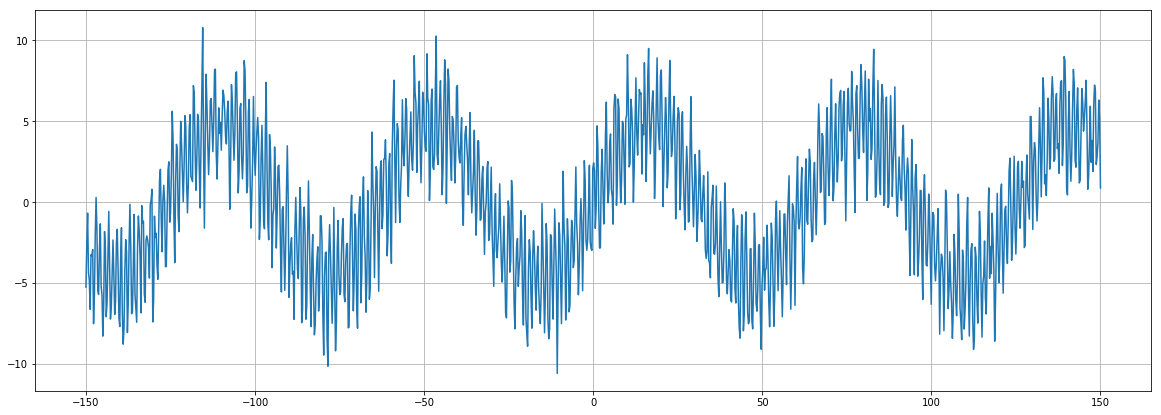

In [13]:
plt.figure(figsize=(20,7))

num = 1200
xs = np.linspace(-150, 150, num)
ys = np.sin(2*xs) + 3*np.cos(5*xs) + 5*np.sin(0.1*xs) + np.random.randn(num)
plt.plot(xs, ys)
plt.grid(True)
plt.show()

На графике видно, что в исследуемом временном ряде есть краткосрочные и долгосрочные колебания.

Приблизим данный ряд с использованием метода скользящего среднего с шириной окна $k=2$ и $k=10$.

Сумма квадратов расстояний при k=2: 13762.986865056548
Сумма квадратов расстояний при k=10: 8008.691533951378


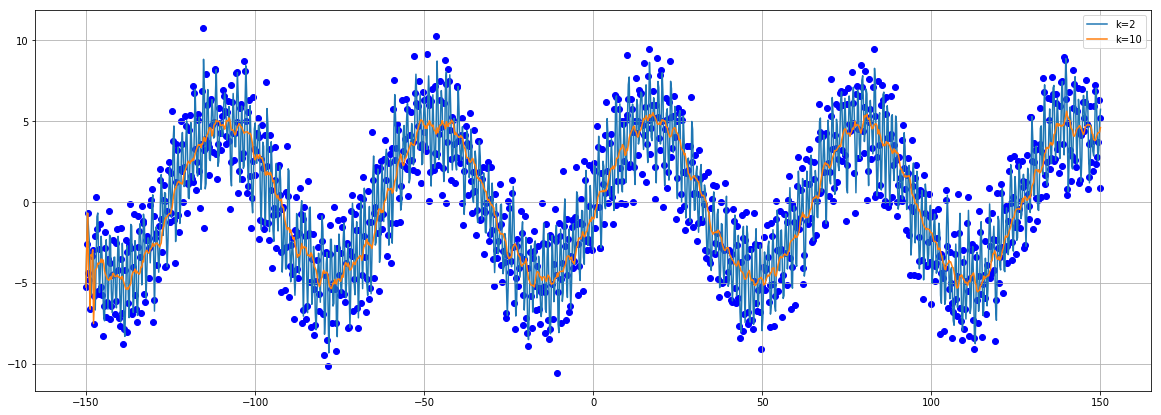

In [14]:
plt.figure(figsize=(20,7))
plt.scatter(xs, ys, c='b')

for k in [2, 10]:
    ys1 = [np.average(ys[t-k:t]) if t>k else yt for t,yt in enumerate(ys)]
    print("Сумма квадратов расстояний при k={}: {}".format(k, np.sum(np.power(ys-ys1,2))))
    plt.plot(xs, ys1, label="k={}".format(k))
    
plt.legend(loc='best')
plt.axis('tight')
plt.grid(True)
plt.show()

Увеличивая размер окна (от $k=2$ до $k=10$) получаем более плавную кривую, передающую характер поведения величины в масштабах больших временных промежутков (переход от часов к дням, неделям, месяцам и т.д.).

Также можно оценивать выбросы по уровню отклонения от среднего значения (в зависимости от задачи можно выбирать разные значения, выраженные в дисперсиях).

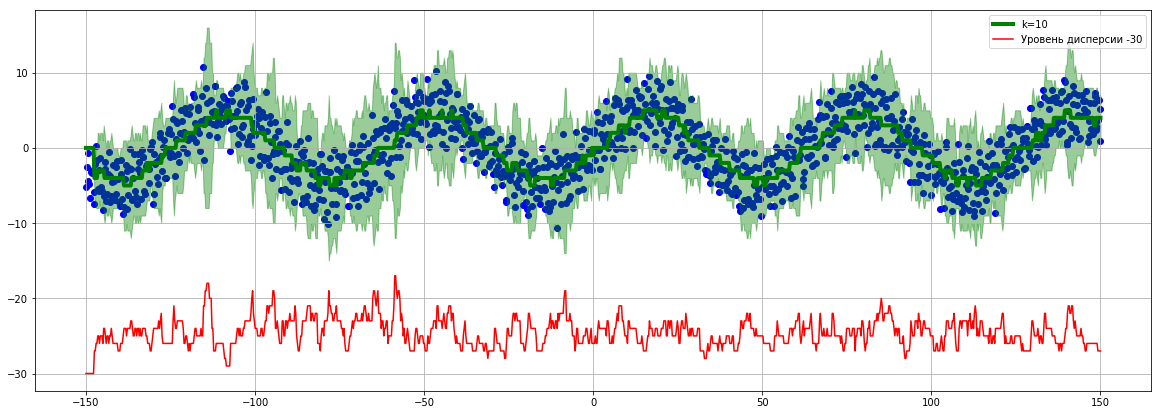

In [15]:
plt.figure(figsize=(20,7))
plt.scatter(xs, ys, c='b')

k = 10
ys1 = np.array([0]*len(ys))
m = np.array([0]*len(ys))
d = np.array([0]*len(ys))

for i in range(k, len(ys)):
    ys1[i] = np.average(ys[i-k:i])
    m[i] = np.mean(ys[i-k:i]) 
    d[i] = np.var(ys[i-k:i])

plt.plot(xs, ys1, label="k={}".format(k), c='g', lw=4)

plt.fill_between(xs, [m[i]-d[i] for i in range(len(ys))], 
                     [m[i]+d[i] for i in range(len(ys))], color='g', alpha=0.4)

plt.plot(xs, d-30, c='r', label='Уровень дисперсии -30')

plt.legend(loc='best')
plt.grid(True)
plt.show()

В библиотеке pandas есть специальная функция для скользящего среднего: pd.DataFrame.rolling().

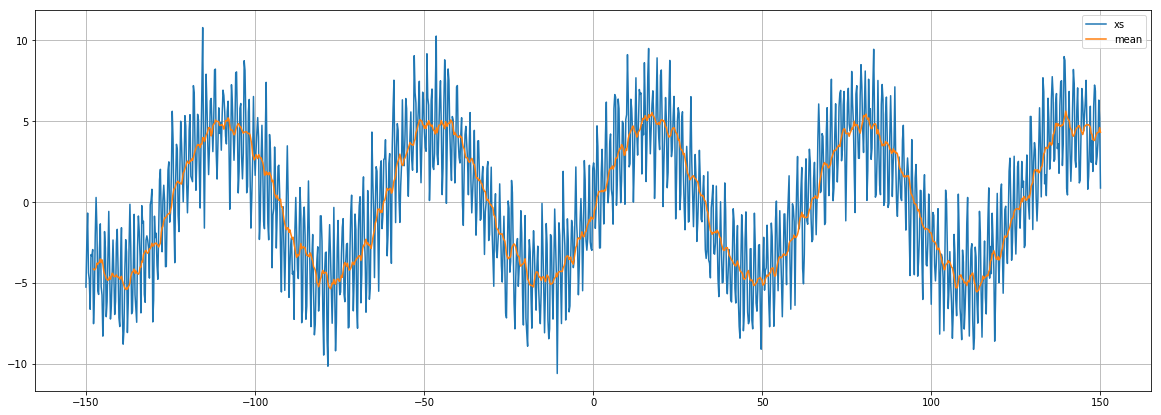

In [16]:
df = pd.DataFrame(np.array(ys), index=xs, columns=['xs'])
df['mean'] = df.rolling(10).mean()
df.plot(figsize=(20,7))

plt.legend(loc='best')
plt.grid(True)
plt.show()

Более точное приближение дает "взвешанное скользящее", когда более близким к текущей временной метке значениям дают большие веса, при этом вектор весов имеет постоянную длину (определяя при этом и постоянную ширину окна).
$$
\Large
\hat{y_t} = \sum_{i=1}^{m}{w_i}y_{t-i}
$$


0.0 0.5 0.667 0.75 0.8 0.833 0.857 0.875 0.889 0.9 

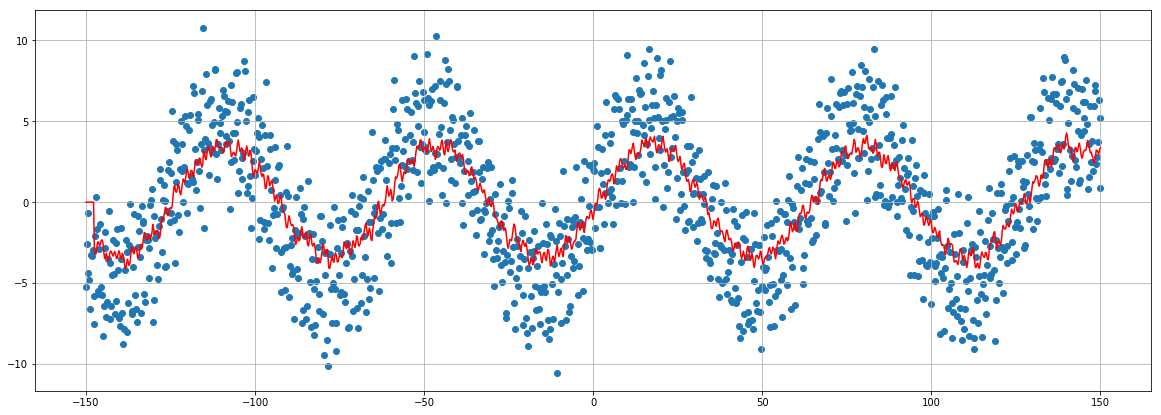

In [17]:
weights = np.array([1-1/i for i in range(1,11)])
for w in weights:
    print(round(w, 3), end=" ")

plt.figure(figsize=(20,7))

plt.scatter(xs, ys)

ys1 = [0]*len(ys)
l = len(weights)
for i in range(l, len(ys)):
    ys1[i] = np.dot(weights, ys[i-l:i])/len(weights)
plt.plot(xs, ys1, c='r')

plt.grid(True)
plt.show()

In [18]:
print("Сумма квадратов расстояний: {:.2f}".format(np.sum(np.power(ys-ys1,2))))

Сумма квадратов расстояний: 10133.68


Подберем оптимальное значение весов с использованием функции поиска минимума scipy.optimize.minimize(), при этом используем метод TNC (Truncated Newton Constrained), позволяющий искать минимум на ограниченном интервале с использованием градиентных методов.

In [19]:
def weighted_moving_average(w):
    ys1 = [0]*len(ys)
    l = len(w)
    for i in range(l, len(ys)):
        ys1[i] = np.dot(w, ys[i-l:i])
        
    return np.sum(np.power(ys-ys1, 2))

#scipy.optimize.minimize()
result = minimize(weighted_moving_average, 
                  [0]*10, 
                  method='TNC', 
                  bounds=[[0,1] for _ in range(10)])

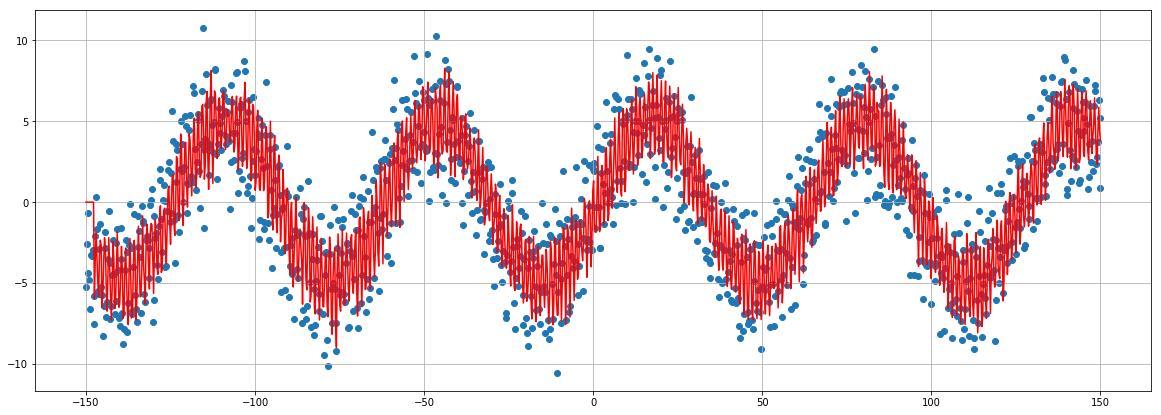

Оптимальные веса:  0.0, 0.5, 0.67, 0.75, 0.8, 0.83, 0.86, 0.88, 0.89, 0.9
Сумма квадратов расстояний: 3072.50


In [20]:
optimal_weights = result.x

plt.figure(figsize=(20,7))
plt.scatter(xs, ys)

ys1 = [0]*len(ys)
l = len(optimal_weights)
for i in range(l, len(ys)):
    ys1[i] = np.dot(optimal_weights, ys[i-l:i])
plt.plot(xs, ys1, c='r')

plt.grid(True)
plt.show()

print("Оптимальные веса: ", ", ".join([str(round(w,2)) for w in weights]))
print("Сумма квадратов расстояний: {:.2f}".format(np.sum(np.power(ys-ys1,2))))

<a href='#toc'>Назад к Оглавлению</a>

## Экспоненциальное усреднение (exponential averaging) <a name='ea'></a>

Развитие идеи учета весов для элементов скользящего окна состоит в использовании всех предыдущих элементов, при этом вес вклада каждого предыдущего элемента уменьшается экспоненциально (чем дальше от текущего элемента, тем значение меньше).

При этом используется следующая формула:

$$
\Large
\hat{y_{i}} = (1-\alpha)\hat{y}_{i-1} + \alpha y_i
$$

$\hat{y}$ - предсказываемые значения, $y$ - значения временного ряда, $\alpha$ - константа сглаживания.

$$
\Large
e = \lim\limits_{t \to \infty} \left( 1+\frac{1}{t}\right)^t
$$

$$
(1-\alpha)(1-\alpha)...(1-\alpha)
$$

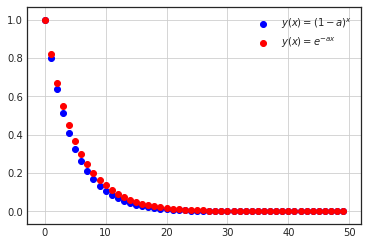

In [21]:
a = 0.2
xs1 = np.arange(50)

with plt.style.context('seaborn-white'):
    plt.scatter(xs1, [(1-a)**i for i in xs1], c='b', label="$y(x)=(1-a)^x$")
    plt.scatter(xs1, np.exp(-a*xs1), c='red', label="$y(x)=e^{-ax}$")
    plt.grid(True)
    plt.legend()


Сумма квадратов расстояний при a=0.5: 2509.20
Сумма квадратов расстояний при a=0.1: 7101.39
Сумма квадратов расстояний при a=0.01: 20234.28


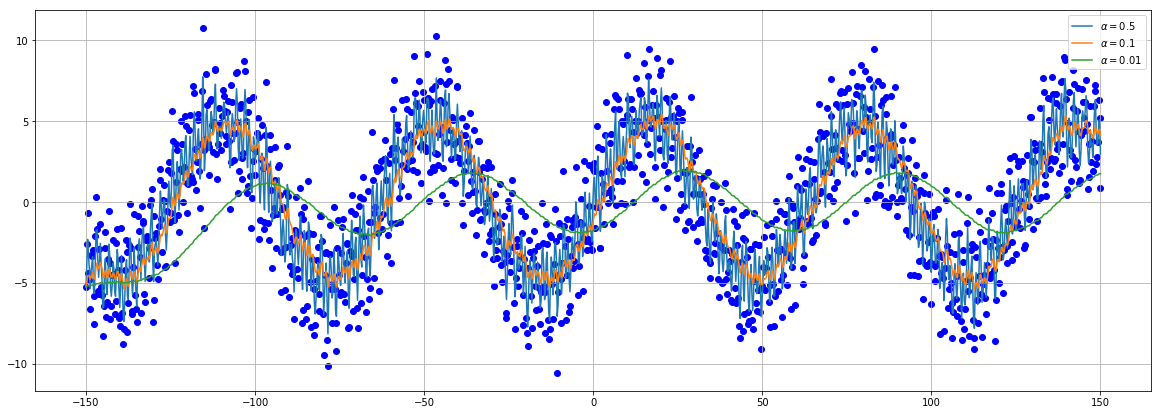

In [22]:
plt.figure(figsize=(20,7))

plt.scatter(xs, ys, c='b')

for a in [0.5, 0.1, 0.01]:
    ys1 = [ys[0]]
    for i in range(1, len(xs)):
        ys1.append((1-a)*ys1[i-1]+a*ys[i])
    plt.plot(xs, ys1, label=r"$\alpha={}$".format(a))
    print("Сумма квадратов расстояний при a={}: {:.2f}".format(a, np.sum(np.power(ys-ys1,2))))

plt.legend(loc='best')
plt.grid(True)
plt.show()

При разных значениях $\alpha$ строятся кривые, описывающие характер изменения графика для разных периодов.

<a href='#toc'>Назад к Оглавлению</a>

## Двойное экспоненциальное выравнивание <a name='dea'></a>

Дополнительно к простому экспоненциальному усреднению добавляются параметры:
- уровень (intercept, level)
- тренд (trend, slope)

Моделируемое значение складывается из уровня и тренда - для учета влияния используются различные константы выравнивания $\alpha$ и $\beta$.

$$
\Large
l_i = \alpha y_i + (1-\alpha)(l_{i-1}+b_{i-1})
$$

$$
\Large
b_i = \beta (l_i - l_{i-1}) + (1-\beta) b_{i-1}
$$

$$
\Large
\hat{y}_{i+1} = l_i + b_i
$$

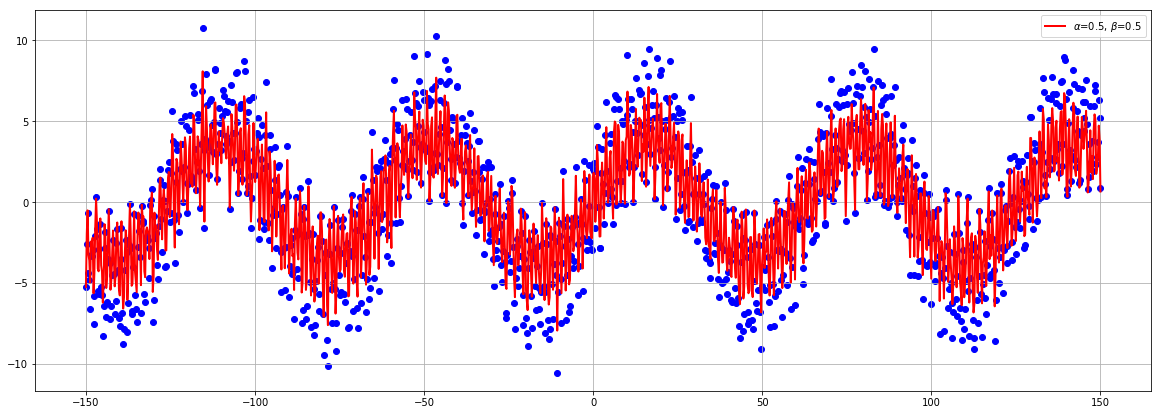

In [23]:
plt.figure(figsize=(20,7))

plt.scatter(xs, ys, c='b')

alpha, beta, color, width = 0.5, 0.5, 'r', 2
ys1 = [ys[0]]
l_prev = 0
b_prev = 0
for i in range(1, len(xs)):
    l = alpha*ys[i] + (1-alpha)*(l_prev+b_prev)
    b = beta*(l-l_prev) + (1-beta)*b_prev
    ys1.append(l+b)

plt.plot(xs, ys1, label=r'$\alpha$={}, $\beta$={}'.format(alpha, beta),
         c=color,
         linewidth=width)

plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [24]:
np.sum(np.power(ys-ys1,2))

1397.1010532714263

При увеличении константы $\alpha$, отвечающей за уровень, моделируемые значения будут приближаться к значениям временного ряда, а при увеличении константы $\beta$, отвечающей за тренд (скорость изменения значений) - моделируемые значения будут тем больше изменяться, чем больше тренд.

Сумма квадратов расстояний при a=1, b=0.1: 223.54
Сумма квадратов расстояний при a=0.1, b=1: 14306.31
Сумма квадратов расстояний при a=0.5, b=0.5: 1397.10


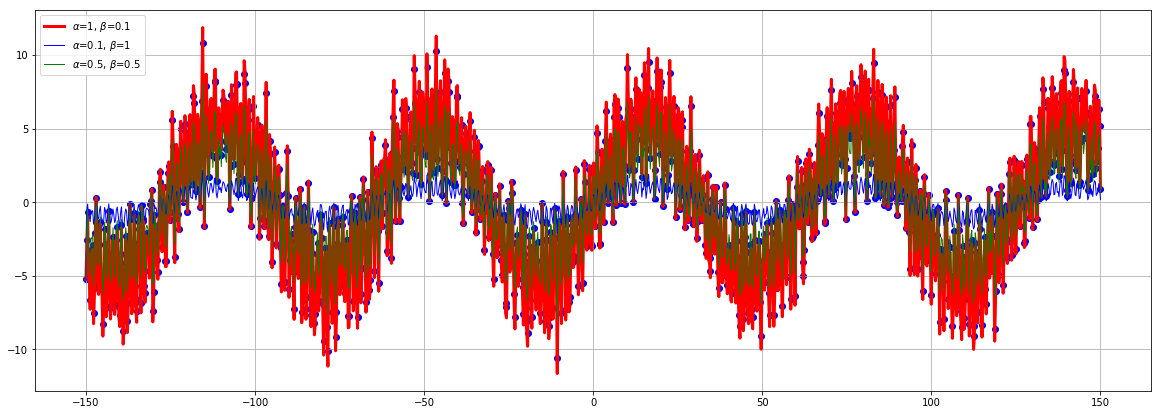

In [25]:
plt.figure(figsize=(20,7))

plt.scatter(xs, ys, c='b')

for alpha, beta, color, width in [[1,   0.1, 'r',3],
                                  [0.1, 1,   'b',1],
                                  [0.5, 0.5, 'g',1]]:
    ys1 = [ys[0]]
    l_prev = 0
    b_prev = 0
    for i in range(1, len(xs)):
        l = alpha*ys[i] + (1-alpha)*(l_prev+b_prev)
        b = beta*(l-l_prev) + (1-beta)*b_prev
        ys1.append(l+b)
    
    print("Сумма квадратов расстояний при a={}, b={}: {:.2f}".format(alpha,
                                                                     beta,
                                                                     np.sum(np.power(ys-ys1,2))))
    
    plt.plot(xs, ys1, label=r'$\alpha$={}, $\beta$={}'.format(alpha, beta),
             c=color,
             linewidth=width)
    
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

## Тройное экспоненциальное сглаживание (модель Хольта-Винтерcа) <a name='tea'></a>

Добавляется сезонность $s$ (seasonality), $L$ - период. С помощью этой модели можем предсказывать $m$ значений вперед.

$$
\Large
l_t = \alpha (y_t - s_{t-L}) + (1-\alpha)(l_{t-1}+b_{t-1})
$$

$$
\Large
b_t = \beta (l_t - l_{t-1}) + (1-\beta) b_{t-1}
$$

$$
\Large
s_t = \gamma (y_t - l_t) + (1-\gamma) s_{t-1}
$$

$$
\Large
\hat{y}_{t+m} = l_t + m b_t +s_{t-L+1+(m-1)\mod L}
$$

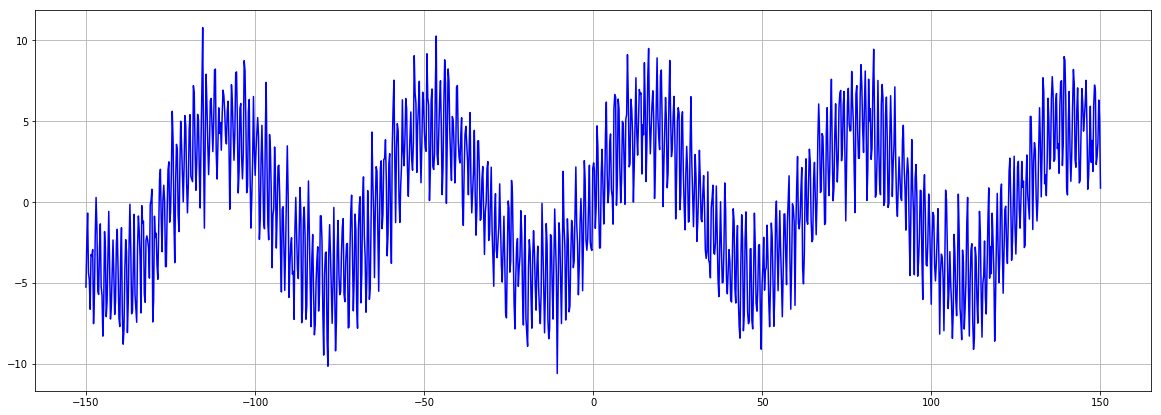

In [26]:
plt.figure(figsize=(20,7))
plt.plot(xs, ys, c='b')
plt.grid(True)
plt.show()

Сумма квадратов расстояний при a=0.1, b=0.1, g=0.1: 2874.70
Сумма квадратов расстояний при a=1, b=1, g=1: 10302.20
Сумма квадратов расстояний при a=0.5, b=0.5, g=0.5: 16569.34
Сумма квадратов расстояний при a=0.1, b=0.9, g=0.3: 4107.43
Сумма квадратов расстояний при a=0.9, b=0.1, g=0.3: 10656804042329082.00


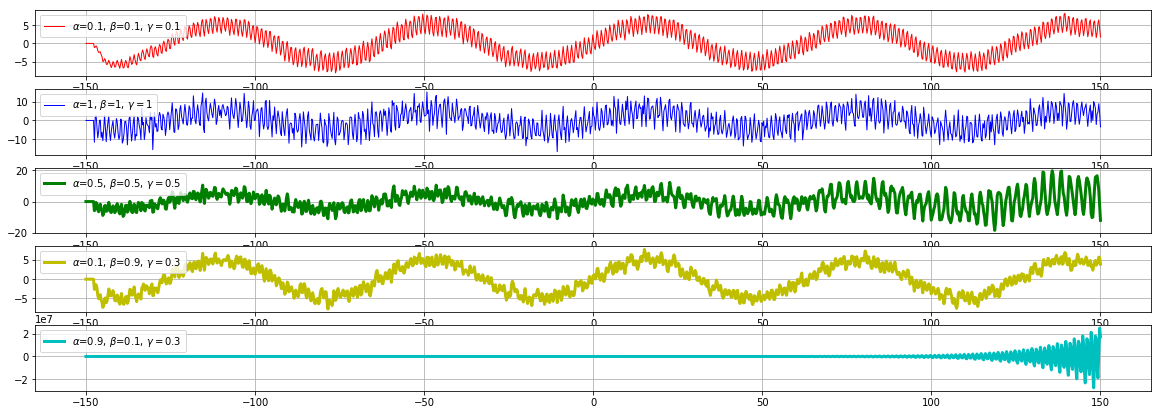

In [27]:
plt.figure(figsize=(20,7))

plt.scatter(xs, ys, c='b')

number = 1
for alpha, beta, gamma, color, width in [[0.1, 0.1, 0.1, 'r', 1],
                                         [1,   1,   1  , 'b', 1],
                                         [0.5, 0.5,  0.5, 'g', 3],
                                         [0.1, 0.9,  0.3, 'y', 3],
                                         [0.9, 0.1,  0.3, 'c', 3],
                                        ]:
    ys2 = [0]*len(ys)
    l_prev = 0
    b_prev = 0
    s = [0]*len(ys)
    L = 10
    for i in range(L, len(xs)):
        l = alpha*(ys[i] - s[i-L]) + (1-alpha)*(l_prev+b_prev)
        b = beta*(l-l_prev) + (1-beta)*b_prev
        l_prev = l
        b_prev = b        
        s[i] = gamma*(ys[i] - l) + (1-beta)*s[i-L]
        ys2[i] = l + b + s[i]

    print("Сумма квадратов расстояний при a={}, b={}, g={}: {:.2f}".format(alpha,
                                                                           beta,
                                                                           gamma,
                                                                           np.sum(np.power(ys-ys2,2))))        
        
    plt.subplot(5, 1, number)
    plt.plot(xs, ys2, label=r'$\alpha$={}, $\beta$={}, $\gamma={}$'.format(alpha, beta, gamma),
             c=color,
             linewidth=width)
    number += 1       
    plt.legend(loc='upper left')
    plt.grid(True)

plt.show()

Реализация модели с использованием примера https://habr.com/ru/company/ods/blog/327242/

In [28]:
class HoltWinters:

    """
    Модель Хольта-Винтерса с методом Брутлага для детектирования аномалий
    https://fedcsis.org/proceedings/2012/pliks/118.pdf

    # series - исходный временной ряд
    # slen - длина сезона
    # alpha, beta, gamma - коэффициенты модели Хольта-Винтерса
    # n_preds - горизонт предсказаний
    # scaling_factor - задаёт ширину доверительного интервала по Брутлагу (обычно принимает значения от 2 до 3)

    """

    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor

    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  

    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # вычисляем сезонные средние
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # вычисляем начальные значения
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []

        seasonals = self.initial_seasonal_components()

        for i in range(len(self.series)+self.n_preds):
            if i == 0: # инициализируем значения компонент
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])

                self.PredictedDeviation.append(0)

                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                continue
            if i >= len(self.series): # прогнозируем
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])

                # во время прогноза с каждым шагом увеличиваем неопределенность
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 

            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])

                # Отклонение рассчитывается в соответствии с алгоритмом Брутлага
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])

            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i % self.slen])

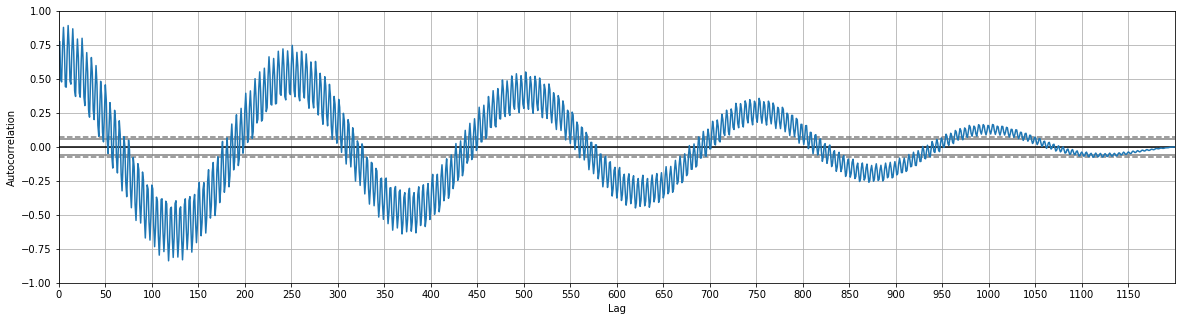

In [29]:
plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(ys)
plt.xticks(range(1200)[::50])
plt.show()

Высокая автокорреляция наблюдается дла лага 250.

Построим функцию ошибок для последующего нахождения коэффициентов $\alpha$, $\beta$, $\gamma$, минимизирующих эту функцию ошибок.

In [30]:
def calc_error(x):
    alpha, beta, gamma = x
    errors = []

    model = HoltWinters(series=ys, slen = 250, alpha=alpha, beta=beta, gamma=gamma, n_preds=0)
    model.triple_exponential_smoothing()

    predictions = model.result 
    actual = ys
    error = mean_squared_error(predictions, actual)
    errors.append(error)

    return np.mean(np.array(errors))    

Решим задачу численной оптимизации.

In [31]:
alpha, beta, gamma = 0, 0, 0
opt = minimize(calc_error, x0=[alpha, beta, gamma], method="TNC", bounds = ((0, 1), (0, 1), (0, 1)))
alpha, beta, gamma = opt.x

Построим предсказание временного ряда с использованием найденных параметров.

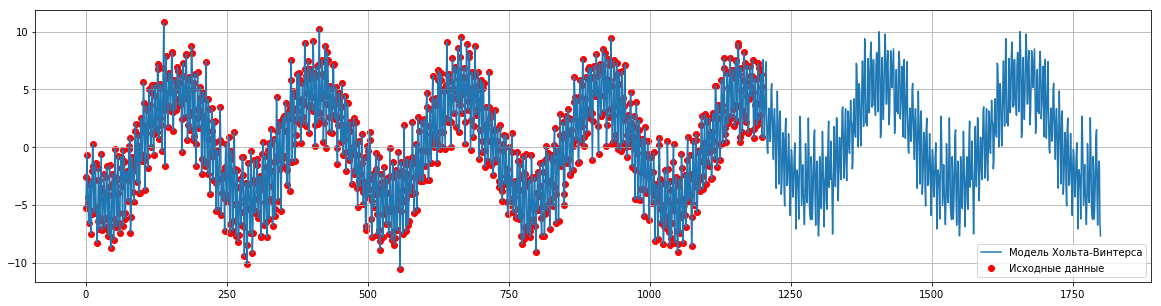

In [32]:
model = HoltWinters(series=ys, slen = 250, alpha=alpha, beta=beta, gamma=gamma, n_preds=600)
model.triple_exponential_smoothing()

plt.figure(figsize=(20, 5))
plt.scatter(range(len(ys)), ys, c='r', label='Исходные данные')
plt.plot(model.result, label='Модель Хольта-Винтерса')
plt.grid(True)
plt.legend(loc='best')
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

## Метрики качества предсказания <a name='metrics'></a>

Рассмотрим различные метрики, использующиеся для оценки качества результатов, полученных с помощью временных рядов.

В качестве модельного примера будем использовать следующий ряд.

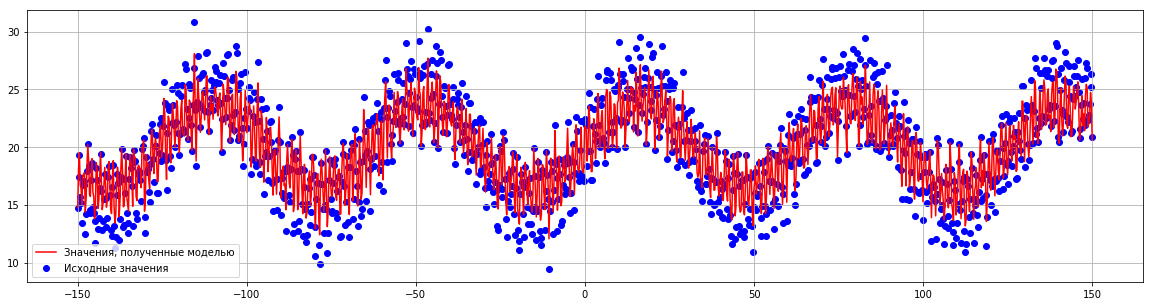

In [33]:
xs = np.array(xs)
ys = np.array(ys)+20
ys1 = np.array(ys1)+20

plt.figure(figsize=(20,5))
plt.scatter(xs, ys, c='b', label='Исходные значения')
plt.plot(xs, ys1, c='r', label='Значения, полученные моделью')
plt.grid(True)
plt.legend(loc='best')
plt.show()

#### $R^2$ (R-квадрат) - коэффициент детерминации.

Доля дисперсии зависимой переменной, объясняемая моделью.

$$
R^2 = 1 - \frac{S_\text{res}}{S_\text{tot}} =
1 - \frac{\sum_i{(y_i - \hat{y_i})^2}}{\sum_i{(y_i - M[y])^2}},
$$

$y_i$ - точное значение, $\hat{y_i}$ - предсказанное моделью значение,
$M[y]$ - среднее значение.

In [34]:
1 - np.sum((ys-ys1)**2)/np.sum((ys-np.mean(ys))**2)

0.9375768363128262

In [35]:
sklearn.metrics.r2_score(ys, ys1)

0.9375768363128262

#### MAE (mean absolute error)

$$
\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}{|y_i-\hat{y_i}|^2}
$$

In [36]:
np.sum([np.abs(a-b) for a,b in zip(ys, ys1)])/len(ys)

0.8988600463952893

In [37]:
sklearn.metrics.mean_absolute_error(ys, ys1)

0.8988600463952893

#### MSE (mean squared error)

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i-\hat{y_i})^2}
$$

In [38]:
np.sum(np.power(ys-ys1,2))/len(ys)

1.1642508777261886

In [39]:
sklearn.metrics.mean_squared_error(ys, ys1)

1.1642508777261886

#### MedAE (median absolute error)

$$
\text{MedAE} = \text{median} \left(|y_1-\hat{y_1}|, ..., |y_n-\hat{y_n}|\right)
$$

Метрика устойчива к выбросам.

In [40]:
np.median(np.abs(ys-ys1))

0.8038626644510725

In [41]:
sklearn.metrics.median_absolute_error(ys, ys1)

0.8038626644510725

#### MSLE (Mean Squared Logarithmic Errors)

$$
MSLE = \frac{1}{n}\sum_{i=1}^{n}{\left[\ln(1+y_i) - \ln(1+\hat{y_i})\right]^2}
$$

Метрика придает больший вес малым ошибкам.

In [42]:
np.mean(np.power(np.log(1+ys)-np.log(1+ys1),2))

0.0033132829381616333

In [43]:
sklearn.metrics.mean_squared_log_error(ys, ys1)

0.003313282938161633

#### MAPE (Mean Absolute Percentage Error)

$$
\text{MAPE} = \frac{100}{n} \sum_{i=1}^{n}{\frac{|y_i - \hat{y_i}|}{y_i}}
$$

In [44]:
np.mean(np.abs(ys-ys1)/ys)*100

4.89491294658991

<a href='#toc'>Назад к Оглавлению</a>

## Кросс-валидация временного ряда <a name='cv'></a>

При разбиении данных временного ряда на обучающую (train) и тестовую (test) выборки необходимо учитывать привязку данных ко времени, данные нельзя перемешивать, так как они упорядочены по времени.

In [45]:
#sklearn.model_selection.TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

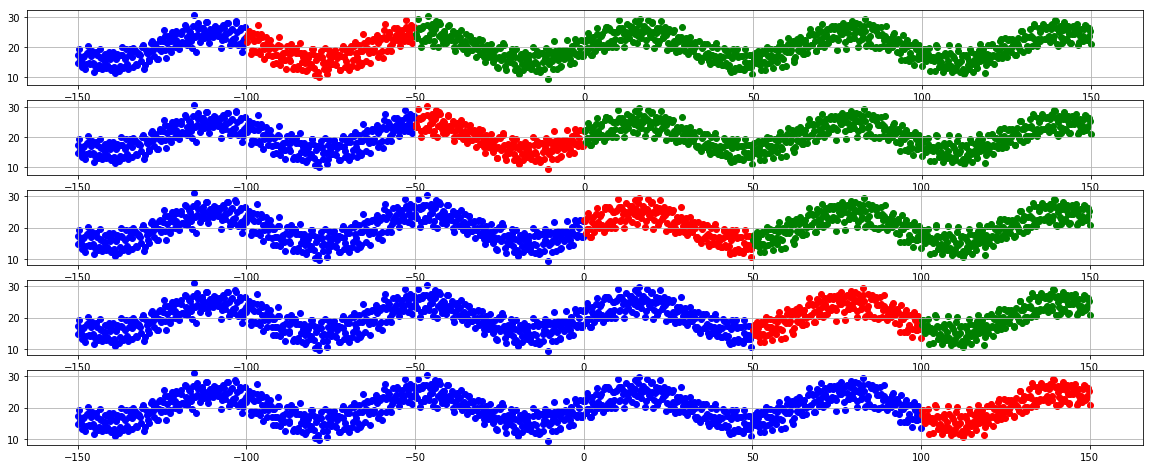

In [46]:
i = 1
plt.figure(figsize=(20,8))
for train, test in tscv.split(ys):
    plt.subplot(5, 1, i)
    i += 1
    plt.scatter(xs[train], ys[train], c='b')
    plt.scatter(xs[test], ys[test], c='r')
    plt.scatter(xs[len(train)+len(test):], ys[len(train)+len(test):], c='g')
    plt.grid()

plt.show()

In [47]:
data = ys[:-30] # отложим часть данных для тестирования

In [48]:
def timeseriesCVscore(x):
    # вектор ошибок
    errors = []

    values = data
    alpha, beta, gamma = x

    # задаём число фолдов для кросс-валидации
    tscv = TimeSeriesSplit(n_splits=3) 

    # идем по фолдам, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen = 7, alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()

        predictions = model.result[-len(test):]
        actual = values[test]
        error = mean_squared_error(predictions, actual)
        errors.append(error)

    # Возвращаем средний квадрат ошибки по вектору ошибок 
    return np.mean(np.array(errors))

In [49]:
%%time

# инициализируем значения параметров
x = [0, 0, 0] 

# Минимизируем функцию потерь с ограничениями на параметры
opt = minimize(timeseriesCVscore, x0=x, method="TNC", bounds = ((0, 1), (0, 1), (0, 1)))

# Из оптимизатора берем оптимальное значение параметров
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

0.039504337676243895 0.004439963693143034 0.04186558312904948
CPU times: user 5.5 s, sys: 32.1 ms, total: 5.53 s
Wall time: 5.48 s


Предсказание

In [50]:
data = ys
model = HoltWinters(data,
                    slen = 250, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 600, 
                    scaling_factor = 2.56)
model.triple_exponential_smoothing()

In [51]:
len(model.result)

1800

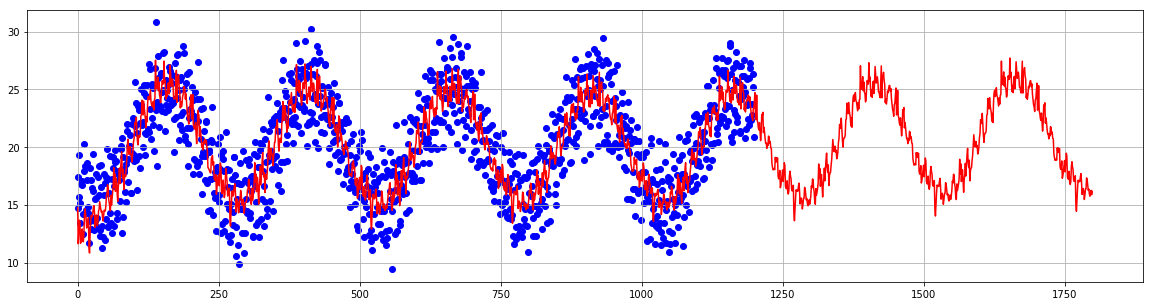

In [52]:
plt.figure(figsize=(20, 5))
plt.scatter(range(len(ys)), ys, c='b')
plt.plot(model.result, c='r')
plt.grid(True)
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Стационарные временные ряды <a name='stationary'></a>

Нестационарность - изменение во времени числовых статистических характеристик (математического ожидания, дисперсии, ковариации). Для нестационарных рядов сложно строить предсказательные модели, поэтому перед построением предсказания для временного ряда необходимо избавиться от нестационарности.

Тест Дики-Фуллера - проверка нестационарности.


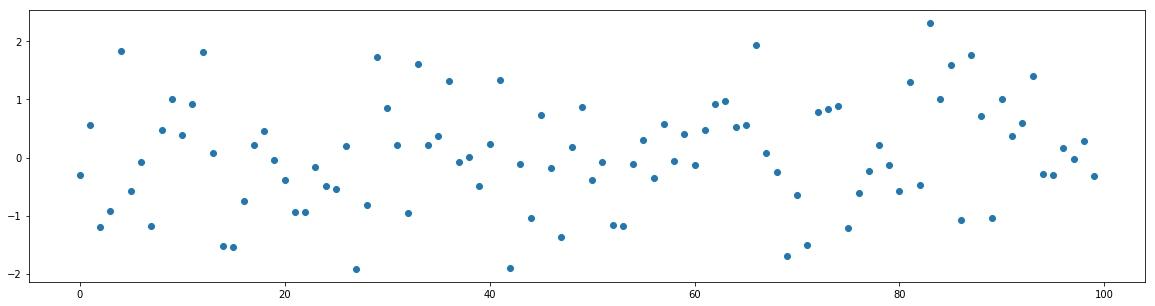

In [53]:
plt.figure(figsize=(20, 5))
wn = np.random.normal(size=100)
plt.scatter(range(len(wn)), wn)
plt.show()

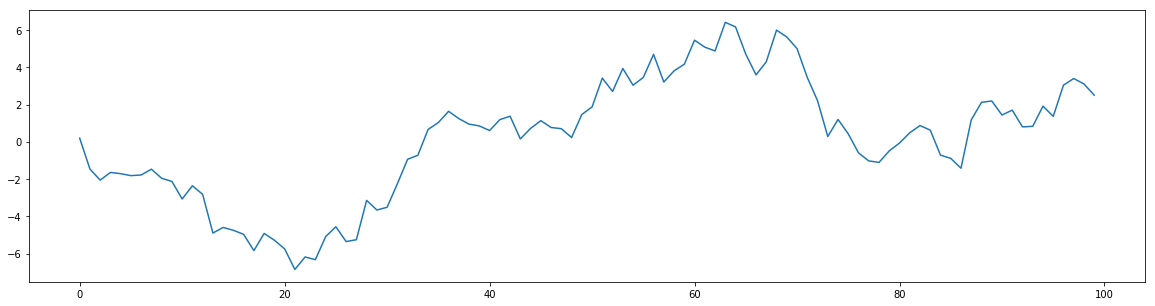

(-1.2697039852236518, 0.6429163245564337, 0, 99, {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}, 235.01059527564215)
0.6429163245564337


In [54]:
x = np.random.normal(size=100)
y = np.random.normal(size=100)
r = 0.99

for t in range(1, len(x)):
    x[t] = r*x[t-1] + y[t]
      
plt.figure(figsize=(20, 5))
plt.plot(x)
plt.show()

print(sm.tsa.stattools.adfuller(x))
print(sm.tsa.stattools.adfuller(x)[1])

Чем ближе $r$ к $1$, тем более нестационарный ряд (найденный коэффициент отличается от нуля).

<a href='#toc'>Назад к Оглавлению</a>

# Стандартные методы анализа временных рядов <a name='standard'></a>

## Модель авторегрессии AR <a name='AR'></a>

Метод авторегрессии (AR) моделирует следующий шаг в последовательности как линейную функцию наблюдений на предыдущих временных шагах.

Обозначения для модели включают в себя указание порядка модели p в качестве параметра для функции AR, например, АР (р). Например, AR (1) является моделью авторегрессии первого порядка.

Метод подходит для одномерных временных рядов без трендовых и сезонных составляющих.

In [55]:
from statsmodels.tsa.ar_model import AR

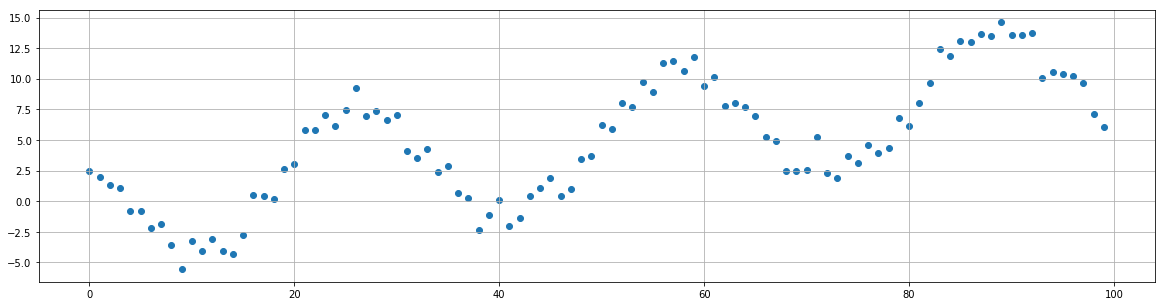

In [56]:
data = 5*np.sin(np.linspace(-10, 10, 100)) + np.arange(100)/10 + np.random.randn(100)

plt.figure(figsize=(20, 5))
plt.scatter(np.arange(100), data)
plt.grid(True)
plt.show()

In [57]:
model = AR(data)
model_fit = model.fit()

In [58]:
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[5.58219665]


<a href='#toc'>Назад к Оглавлению</a>

## Модель скользящего среднего MA <a name='MA'></a>

Метод скользящего среднего (MA) моделирует следующий шаг в последовательности как линейную функцию от остаточных ошибок из среднего процесса на предыдущих временных шагах.

Модель скользящего среднего отличается от вычисления скользящего среднего временного ряда.

Обозначение для модели включает в себя указание порядка модели q в качестве параметра функции MA, например, М. А. (д). Например, MA (1) является моделью скользящего среднего первого порядка.

Метод подходит для одномерных временных рядов без трендовых и сезонных составляющих.

In [59]:
from statsmodels.tsa.arima_model import ARMA

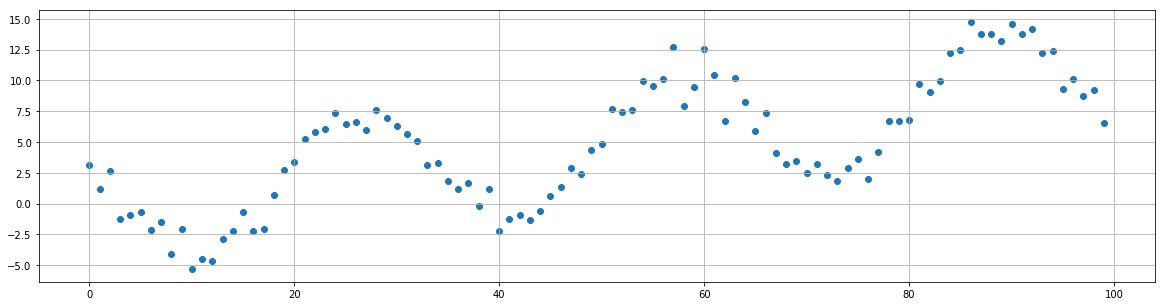

In [60]:
data = 5*np.sin(np.linspace(-10, 10, 100)) + np.arange(100)/10 + np.random.randn(100)

plt.figure(figsize=(20, 5))
plt.scatter(np.arange(100), data)
plt.grid(True)
plt.show()

In [61]:
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)

In [62]:
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[3.68034938]


<a href='#toc'>Назад к Оглавлению</a>

## Модель авторегрессионного скользящего среднего ARMA <a name='ARMA'></a>

Метод авторегрессионного скользящего среднего (ARMA) моделирует следующий шаг в последовательности как линейную функцию наблюдений и случайных ошибок на предыдущих временных шагах.

Он объединяет модели авторегрессии (AR) и скользящей средней (MA).

Обозначение модели включает в себя указание порядка для моделей AR (p) и MA (q) в качестве параметров функции ARMA, например, ARMA (p, q). Модель ARIMA может использоваться для разработки моделей AR или MA.

Метод подходит для одномерных временных рядов без трендовых и сезонных составляющих.

In [63]:
from statsmodels.tsa.arima_model import ARMA

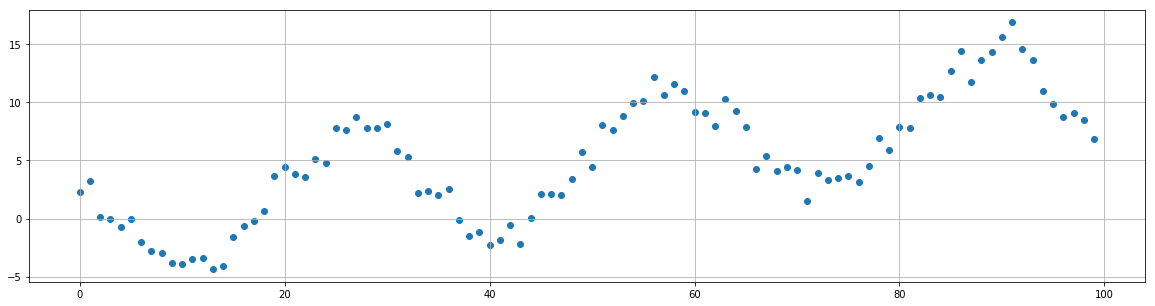

In [64]:
data = 5*np.sin(np.linspace(-10, 10, 100)) + np.arange(100)/10 + np.random.randn(100)

plt.figure(figsize=(20, 5))
plt.scatter(np.arange(100), data)
plt.grid(True)
plt.show()

In [65]:
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[6.82688385]


<a href='#toc'>Назад к Оглавлению</a>

# Авторегрессионное интегрированное скользящее среднее (ARIMA) <a name='ARIMA'></a>

Метод авторегрессионного интегрированного скользящего среднего (ARIMA) моделирует следующий шаг в последовательности как линейную функцию разностных наблюдений и остаточных ошибок на предыдущих временных шагах.

Он объединяет модели авторегрессии (AR) и скользящего среднего (MA), а также этап предварительной обработки разностной последовательности, чтобы сделать последовательность стационарной, называемой интеграцией (I).

Обозначения для модели включают указание порядка для моделей AR (p), I (d) и MA (q) в качестве параметров функции ARIMA, например, АРИМА (p, d, q). Модель ARIMA также может быть использована для разработки моделей AR, MA и ARMA.

Метод подходит для одномерных временных рядов с трендом и без сезонных компонентов.

In [66]:
from statsmodels.tsa.arima_model import ARIMA

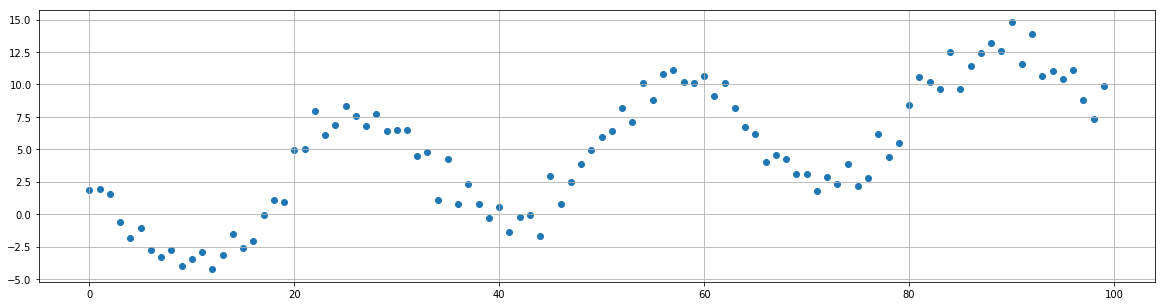

In [67]:
data = 5*np.sin(np.linspace(-10, 10, 100)) + np.arange(100)/10 + np.random.randn(100)

plt.figure(figsize=(20, 5))
plt.scatter(np.arange(100), data)
plt.grid(True)
plt.show()

In [68]:
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)

In [69]:
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[8.9528708]


<a href='#toc'>Назад к Оглавлению</a>

# Сезонные авторегрессионные интегрированные скользящие средние (SARIMA) <a name='SARIMA'></a>

Метод сезонного авторегрессионного интегрированного скользящего среднего (SARIMA) моделирует следующий шаг в последовательности как линейную функцию разностных наблюдений, ошибок, разностных сезонных наблюдений и сезонных ошибок на предыдущих временных шагах.

Он сочетает в себе модель ARIMA с возможностью выполнения той же модели авторегрессии, дифференцирования и скользящего среднего на сезонном уровне.

Обозначения для модели включают указание порядка для моделей AR (p), I (d) и MA (q) в качестве параметров функции ARIMA и AR (P), I (D), MA (Q) и m. параметры на сезонном уровне, например SARIMA (p, d, q) (P, D, Q) m, где $m$ - количество временных шагов в каждом сезоне (сезонный период). Модель SARIMA может использоваться для разработки моделей AR, MA, ARMA и ARIMA.

Метод подходит для одномерных временных рядов с трендовыми и / или сезонными компонентами.

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

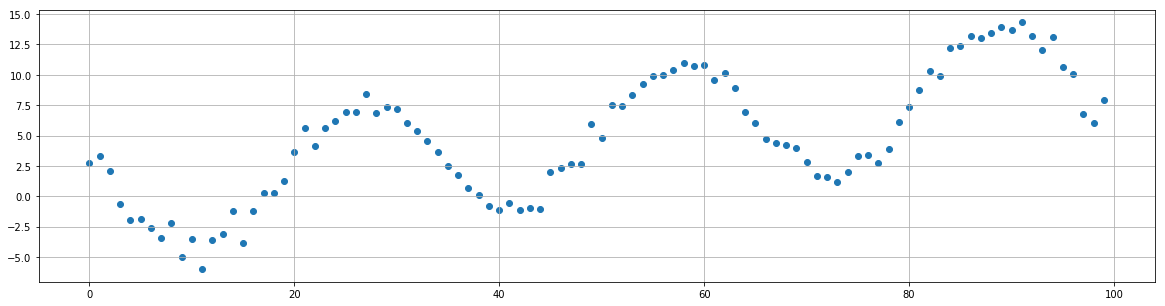

In [71]:
data = 5*np.sin(np.linspace(-10, 10, 100)) + np.arange(100)/10 + np.random.randn(100)

plt.figure(figsize=(20, 5))
plt.scatter(np.arange(100), data)
plt.grid(True)
plt.show()

In [72]:
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 2))
model_fit = model.fit(disp=False)

In [73]:
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[6.62961872]


<a href='#toc'>Назад к Оглавлению</a>

# Сезонные авторегрессионные интегрированные скользящие средние с экзогенными регрессорами (SARIMAX) <a name='SARIMAX'></a>

Сезонная авторегрессионная интегрированная скользящая средняя с экзогенными регрессорами (SARIMAX) является расширением модели SARIMA, которая также включает моделирование экзогенных переменных.

Экзогенные переменные также называются ковариатами, и их можно рассматривать как параллельные входные последовательности, наблюдения которых выполняются с теми же временными шагами, что и исходный ряд. Первичные серии могут быть названы эндогенными данными, чтобы отличать их от экзогенной последовательности (последовательностей). Наблюдения за экзогенными переменными включаются в модель непосредственно на каждом временном шаге и не моделируются так же, как первичная эндогенная последовательность (например, процесс AR, MA и т. Д.).

Метод SARIMAX также можно использовать для моделирования подгруппированных моделей с внешними переменными, такими как ARX, MAX, ARMAX и ARIMAX.

Метод подходит для одномерных временных рядов с трендовыми и / или сезонными компонентами и экзогенными переменными.

In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data1 = [x + random() for x in range(1, 100)]
data2 = [x + random() for x in range(101, 200)]
# fit model
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
exog2 = [200 + random()]
yhat = model_fit.predict(len(data1), len(data1), exog=[exog2])
print(yhat)

[100.35203881]


<a href='#toc'>Назад к Оглавлению</a>

# Векторная авторегрессия (VAR) <a name='VAR'></a>

Метод векторной авторегрессии (VAR) моделирует следующий шаг в каждом временном ряду, используя модель AR. Это обобщение AR на несколько параллельных временных рядов, например, многомерный временной ряд.

Обозначение модели включает в себя указание порядка для модели AR (p) в качестве параметров функции VAR, например, ВДП (р).

Метод подходит для многомерных временных рядов без трендовых и сезонных составляющих.

In [75]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [76]:
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)

In [77]:
model = VAR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[100.84151611 101.37116508]]


<a href='#toc'>Назад к Оглавлению</a>

# Скользящее среднее векторной авторегрессии (VARMA) <a name='VARMA'></a>

Метод скользящей средней векторной авторегрессии (VARMA) моделирует следующий шаг в каждом временном ряду, используя модель ARMA. Это обобщение ARMA для нескольких параллельных временных рядов, например, многомерный временной ряд.

Обозначение модели включает в себя указание порядка для моделей AR (p) и MA (q) в качестве параметров функции VARMA, например, Варма (р, д). Модель VARMA также может быть использована для разработки моделей VAR или VMA.

Метод подходит для многомерных временных рядов без трендовых и сезонных составляющих.

In [78]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)

[[0.5993316  1.08340925]]


<a href='#toc'>Назад к Оглавлению</a>

# Скользящее среднее векторной авторегрессии с экзогенными регрессорами (VARMAX) <a name='VARMAX'></a>

Скользящее среднее векторной авторегрессии с экзогенными регрессорами (VARMAX) является расширением модели VARMA, которая также включает моделирование экзогенных переменных. Это многовариантная версия метода ARMAX.

Экзогенные переменные также называются ковариатами, и их можно рассматривать как параллельные входные последовательности, наблюдения которых выполняются с теми же временными шагами, что и исходный ряд. Первичный ряд (ы) называют эндогенными данными, чтобы отличать их от экзогенной последовательности (последовательностей). Наблюдения за экзогенными переменными включаются в модель непосредственно на каждом временном шаге и не моделируются так же, как первичная эндогенная последовательность (например, процесс AR, MA и т. Д.).

Метод VARMAX также можно использовать для моделирования подгруппированных моделей с внешними переменными, такими как VARX и VMAX.

Метод подходит для многомерных временных рядов без трендовых и сезонных компонентов и экзогенных переменных.

In [79]:
from statsmodels.tsa.statespace.varmax import VARMAX

from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
    data_exog = [x + random() for x in range(100)]

model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
print(yhat)

[[0.46896032 0.84692768]]


<a href='#toc'>Назад к Оглавлению</a>

# Нейронные сети для анализа временных рядов <a name='neural'></a>

TBD

<a href='#toc'>Назад к Оглавлению</a>

# Пример 1: применение моделей ARIMA и SARIMA <a name='example1'></a>

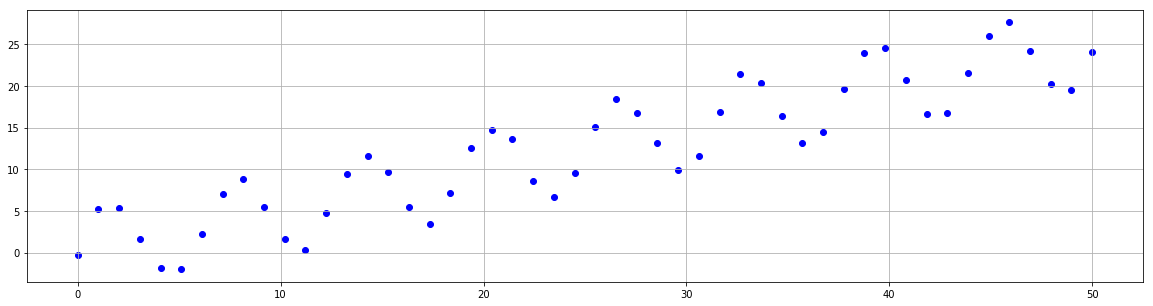

In [80]:
num = 50
xs = np.linspace(0, 50, num)
ys = 5*np.sin(xs) + np.random.random(num) - 0.5 + 0.5*xs
plt.figure(figsize=(20,5))
plt.scatter(xs, ys, c='b')
plt.grid(True)
plt.show()

## Модель ARIMA <a name='ARIMA-example'></a>

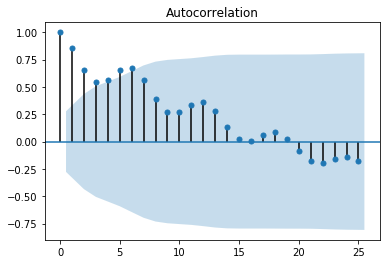

In [81]:
sm.graphics.tsa.plot_acf(ys, lags=25)
plt.show()

Из этого графика определяем $q$ (для MA) - третий параметр в ARIMA(p,d,q). Величина $q$ равна последнему, отличному от нуля элементу на графике.

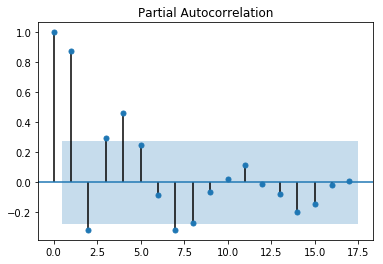

In [82]:
sm.graphics.tsa.plot_pacf(ys)
plt.show()

Из этого графика определяем $p$ (для AR) - первый параметр в ARIMA(p,d,q). Величина $p$ равна последнему (подряд с начала) не равному нулю элементу.

In [83]:
model = sm.tsa.arima.ARIMA(ys, order=(5,1,3)).fit()

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                 ARIMA(5, 1, 3)   Log Likelihood                 -33.924
Date:                Tue, 29 Sep 2020   AIC                             85.849
Time:                        12:53:53   BIC                            102.875
Sample:                             0   HQIC                            92.308
                                 - 50                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3098      0.112      2.756      0.006       0.089       0.530
ar.L2          0.7041      0.142      4.971      0.000       0.426       0.982
ar.L3         -0.9183      0.104     -8.795      0.000      -1.123      -0.714
ar.L4          0.1103      0.132      0.835      0.404      -0.149       0.369
ar.L5          0.7932      0.112      7.082      0.000       0.574       1.013
ma.L1         -0.9365    207.047     -0.005      0.996    -406.741     404.868
ma.L2         -0.9669    400.761     -0.002      0.998    -786.444     784.510
ma.L3          0.9695    200.552      0.005      0.996    -392.106     394.045
sigma2         0.1396     28.861      0.005      0.996     -56.428      56.707
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.75   Prob(JB):                         0.69
Heteroskedasticity (H):               0.66   Skew:                             0.28
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
result = model.predict(0, len(ys)+10)

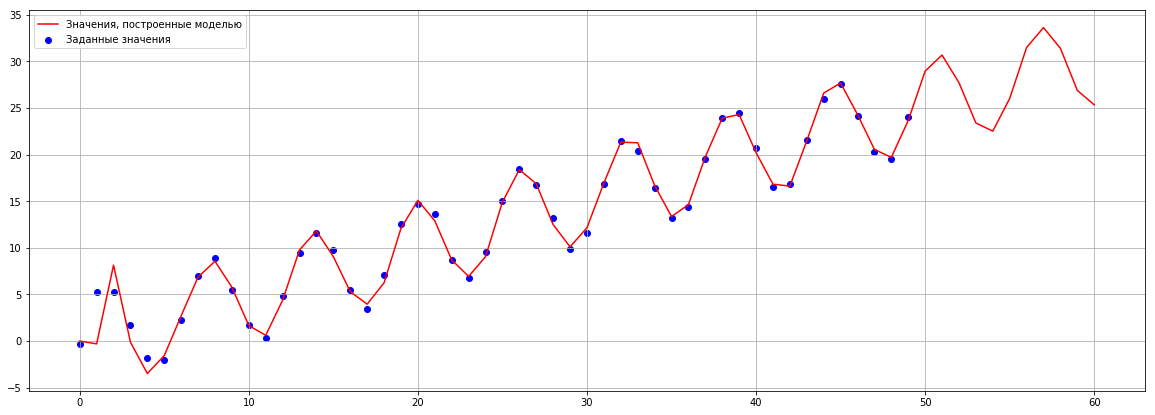

In [86]:
plt.figure(figsize=(20, 7))
plt.scatter(range(len(ys)), ys, c='b', label='Заданные значения')
plt.plot(result, c='r', label='Значения, построенные моделью')
plt.grid(True)
plt.legend(loc='best')
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

## Модель SARIMA <a name='SARIMA-example'></a>

Добавляется сезонность.

In [87]:
sarima_model = sm.tsa.statespace.SARIMAX(ys, order=(2, 1, 2), seasonal_order=(4, 1, 1, 24)).fit(disp=-1)

In [88]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   50
Model:             SARIMAX(2, 1, 2)x(4, 1, [1], 24)   Log Likelihood                 -18.299
Date:                              Tue, 29 Sep 2020   AIC                             56.598
Time:                                      12:54:09   BIC                             68.787
Sample:                                           0   HQIC                            59.979
                                               - 50                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0393      0.720      1.444      0.149      -0.372       2.450
ar.L2         -0.9924      0.522     -1.901      0.057      -2.016       0.031
ma.L1         -1.2679      0.929     -1.365      0.172      -3.088       0.553
ma.L2          0.7530      1.176      0.640      0.522      -1.553       3.059
ar.S.L24      -0.2123   6545.227  -3.24e-05      1.000   -1.28e+04    1.28e+04
ar.S.L48       1.1437   2054.490      0.001      1.000   -4025.583    4027.870
ar.S.L72      -0.3012   1.06e+04  -2.83e-05      1.000   -2.09e+04    2.09e+04
ar.S.L96      -0.9089   1.27e+04  -7.14e-05      1.000   -2.49e+04    2.49e+04
ma.S.L24      -0.5027   1.87e+04  -2.69e-05      1.000   -3.66e+04    3.66e+04
sigma2         0.0089    732.406   1.21e-05      1.000   -1435.481    1435.499
===================================================================================
Ljung-Box (L1) (Q):                   3.04   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.08   Prob(JB):                         0.84
Heteroskedasticity (H):               0.97   Skew:                             0.24
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
result = sarima_model.predict(0, len(ys)+10)

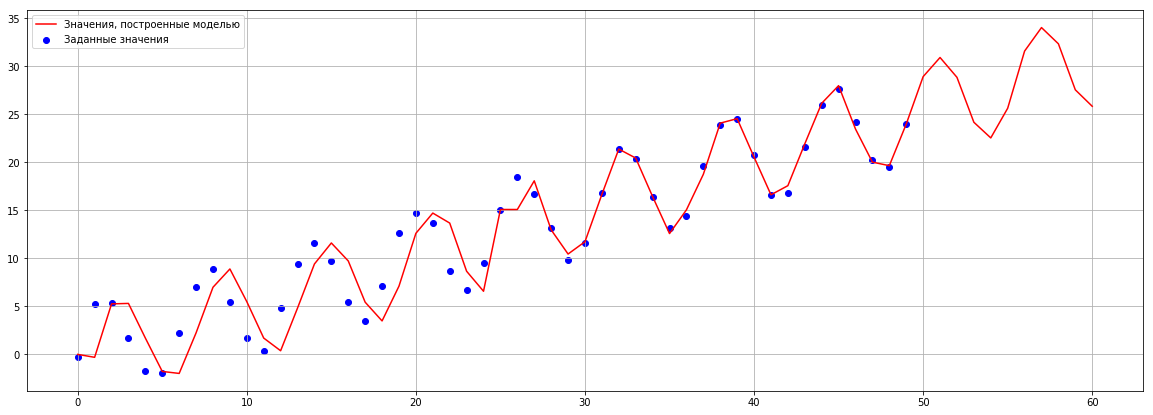

In [90]:
plt.figure(figsize=(20, 7))
plt.scatter(range(len(ys)), ys, c='b', label='Заданные значения')
plt.plot(result, c='r', label='Значения, построенные моделью')
plt.grid(True)
plt.legend(loc='best')
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Пример 2: анализ многомерных временных рядов <a name='example2'></a>

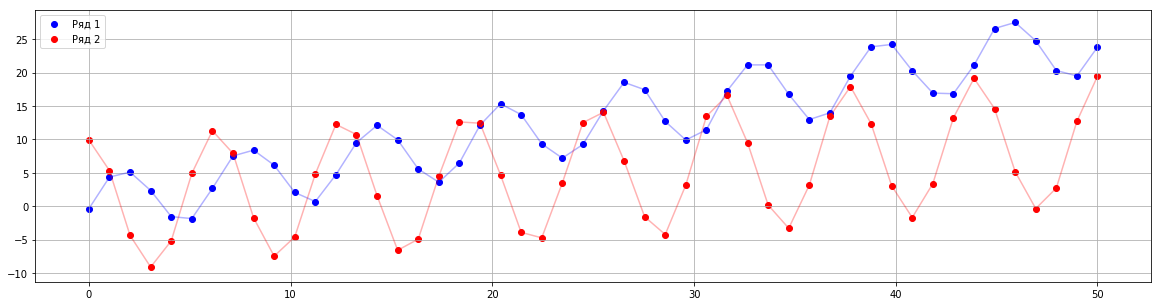

In [91]:
num = 50
xs = np.linspace(0, 50, num)
ys1 = 5*np.sin(xs) + np.random.random(num) - 0.5 + 0.5*xs
ys2 = 10*np.cos(xs) + np.random.random(num) - 0.5 + 0.2*xs

plt.figure(figsize=(20,5))
plt.scatter(xs, ys1, c='b', label="Ряд 1")
plt.plot(xs, ys1, c='b', alpha=0.3)
plt.scatter(xs, ys2, c='r', label="Ряд 2")
plt.plot(xs, ys2, c='r', alpha=0.3)
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [92]:
data = [[y1, y2] for y1, y2 in zip(ys1, ys2)]

In [93]:
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
yhat = model_fit.forecast(20)

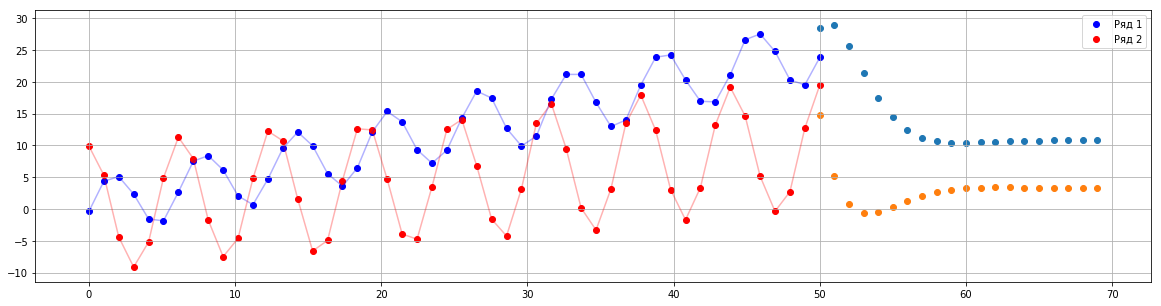

In [94]:
plt.figure(figsize=(20,5))

plt.scatter(xs, ys1, c='b', label="Ряд 1")
plt.plot(xs, ys1, c='b', alpha=0.3)
plt.scatter(np.arange(xs[-1],xs[-1]+20), np.array(yhat)[:,0])

plt.scatter(xs, ys2, c='r', label="Ряд 2")
plt.plot(xs, ys2, c='r', alpha=0.3)
plt.scatter(np.arange(xs[-1],xs[-1]+20), np.array(yhat)[:,1])

plt.grid(True)
plt.legend(loc='best')
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Ссылки <a name='links'></a>

- https://www.machinelearningmastery.ru/time-series-data-visualization-with-python/

- https://www.statsmodels.org/stable/index.html

- mlcourse.ai, Открытый курс машинного обучения. Тема 9. Анализ временных рядов с помощью Python https://habr.com/ru/company/ods/blog/327242/

-  11 классических способов анализа временных рядов https://www.machinelearningmastery.ru/time-series-forecasting-methods-in-python-cheat-sheet/

- Анализ временных рядов с помощью python https://habr.com/ru/post/207160/

- Построение модели SARIMA с помощью Python+R https://habr.com/ru/post/210530/


- Модель авторегрессии AR https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%B0%D0%B2%D1%82%D0%BE%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%E2%80%94_%D1%81%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B5%D0%B3%D0%BE_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B3%D0%BE

- Модель ARIMA https://ru.wikipedia.org/wiki/ARIMA

<a href='#toc'>Назад к Оглавлению</a>